In [7]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Non pythonic way

In [5]:
# Generate some FAKE data
x = pd.period_range('1980-01-01', periods=410, freq='M')
x = x.to_timestamp().to_pydatetime()
y = np.random.randn(len(x)).cumsum()

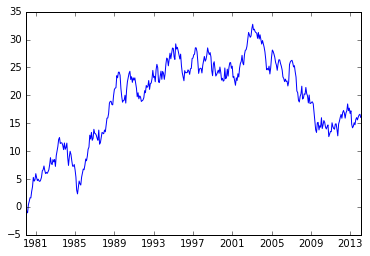

In [8]:
# Plot the data
plt.plot(x,y, label='FDI')

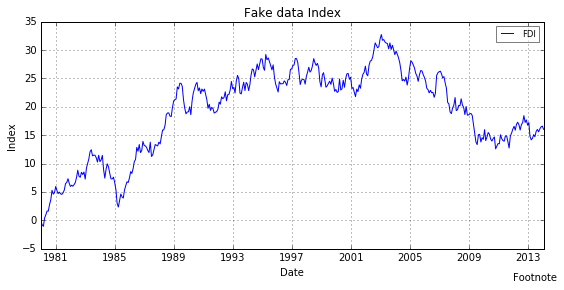

In [10]:
#Adding labels to prettify the plots
plt.plot(x,y, label='FDI')
plt.title('Fake data Index')
plt.xlabel('Date')
plt.ylabel('Index')
plt.grid(True)
plt.figtext(0.995, 0.01, 'Footnote', ha='right', va='bottom' )
plt.legend(loc='best', framealpha=0.5, prop={'size':'small'})
plt.tight_layout(pad=1)
plt.gcf().set_size_inches(8,4)

#save figure
#plt.savefig('mygraph.png')
plt.show()

# Matplotlib OOP Way

In [11]:
#fig = plt.figure(num=None, figsize = None, dpi=None, facecolor=None, edgecolor=None)
'''
for i in plt.get_fignums():
fig = plt.figure(i) # get the figure
print (fig.number) # do something
'''


'\nfor i in plt.get_fignums():\nfig = plt.figure(i) # get the figure\nprint (fig.number) # do something\n'

# Line plots using ax.plot()

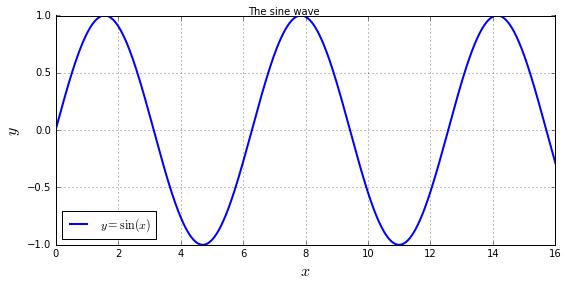

In [17]:
#Get the data
x = np.linspace(0, 16, 800)
y = np.sin(x)

# Get an empty figure and add axes
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1) #row column numbr
ax.plot(x, y, 'b-',linewidth=2, label=r'$y=\sin(x)$')

#Add title labels and legend
ax.set_ylabel(r'$y$', fontsize=16);
ax.set_xlabel(r'$x$', fontsize=16)
ax.legend(loc='best')
ax.grid(True)
fig.suptitle('The sine wave')
fig.tight_layout(pad=1)
fig.savefig('filename2.jpg', dpi=125)


# Multiple lines with Markers

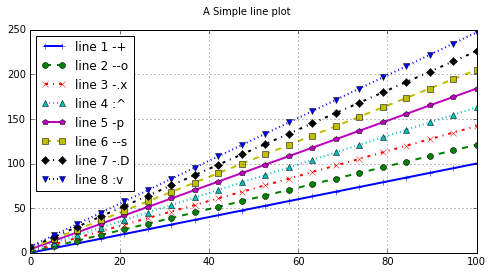

In [19]:
# Get figure and axes all at once
fig, ax = plt.subplots(figsize=(8,4))

# Plot some lines
N = 8   #Number of lines
styles = ['-', '--', '-.', ':']
markers = list('+ox^psDv')
x = np.linspace(0, 100, 20)
for i in range(N): #add line by line
    y = x + x/5*i + i
    s = styles[i % len(styles)]
    m = markers[i % len(markers)]
    ax.plot(x, y, label = 'line '+ str(i+1) + ' ' + s+m, marker=m, linewidth=2, linestyle=s)
    
# add grid legend title and save
ax.grid(True)
ax.legend(loc='best', prop={'size':'large'})
fig.suptitle('A Simple line plot')
fig.savefig('line.png', dpi=125)
    

# Scatter plots using ax.scatter()

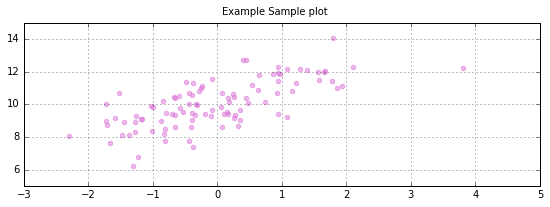

In [22]:
x = np.random.randn(100)
y= x + np.random.randn(100) + 10

fig, ax = plt.subplots(figsize=(8,3))
ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Example Sample plot')
fig.tight_layout(pad=2);
ax.grid(True)
fig.savefig('scatter.png', dpi=125)


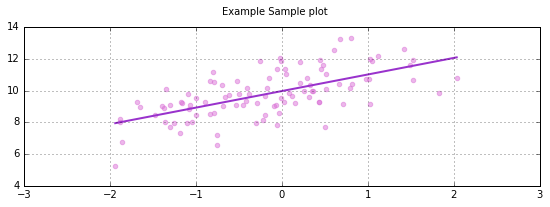

In [26]:
x = np.random.randn(100)
y= x + np.random.randn(100) + 10

fig, ax = plt.subplots(figsize=(8,3))
ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Example Sample plot')
fig.tight_layout(pad=2);
ax.grid(True)
fig.savefig('scatter.png', dpi=125)
# Add a regression line
import statsmodels.api as sm
x = sm.add_constant(x) #Intercept

#Model: y~x+c
model = sm.OLS(y,x)
fitted = model.fit()
x_pred = np.linspace(x.min(), x.max(), 50)
x_pred2 = sm.add_constant(x_pred)
y_pred = fitted.predict(x_pred2)
ax.plot(x_pred, y_pred, '-',
color='darkorchid', linewidth=2)
plt.show()
#fig.savefig('filename2.png', dpi=125)

# Marker size and color

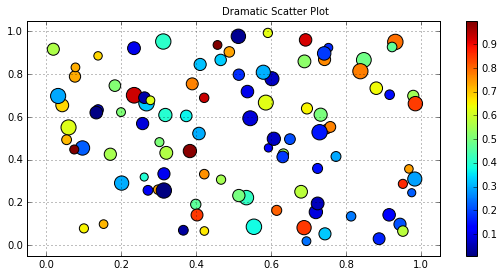

In [34]:
N = 100
x = np.random.rand(N)
y = np.random.rand(N)
size = ((np.random.rand(N) + 1) * 8) ** 2
colours = np.random.rand(N)
fig, ax = plt.subplots(figsize=(8,4))
l = ax.scatter(x, y, s=size, c = colours)
fig.colorbar(l)
ax.set_xlim((-0.05, 1.05))
ax.set_ylim((-0.05, 1.05))
fig.suptitle('Dramatic Scatter Plot')
fig.tight_layout(pad=2);
ax.grid(True)
fig.savefig('colorbar.png', dpi=125)

# Simple Bar Chart

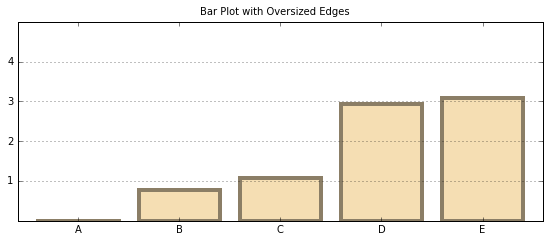

In [42]:
#Get data
N = 5
labels = list('ABCDEFGHIJLMN'[0:N])
data = np.array(range(N)) + np.random.randn(N)
#data

#Plot the data
fig, ax = plt.subplots(figsize=(8, 3.5))
width = 0.8;
tickLocations = np.arange(N)
rectlocations = tickLocations-(width/2.0)
ax.bar(rectLocations, data, width, color='wheat', edgecolor='#8B7E66', linewidth=4.0)
#--Pretty the plots
ax.set_xticks(ticks= tickLocations)
ax.set_xticklabels(labels)
ax.set_xlim(min(tickLocations)-0.6, max(tickLocations)+0.6)
ax.set_yticks(range(N)[1:])
ax.set_ylim((0,N))
ax.yaxis.grid(True)

# --- title and save
fig.suptitle("Bar Plot with " +"Oversized Edges")
fig.tight_layout(pad=2)
fig.savefig('bar.png', dpi=125)


# Side by side bar

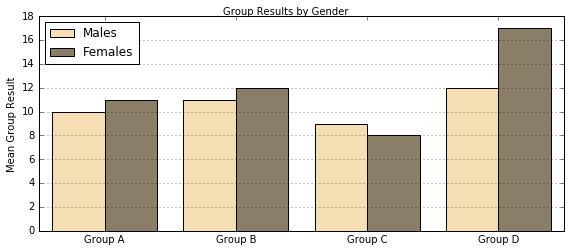

In [46]:
# --- get the data
before = np.array([10, 11, 9, 12])
after = np.array([11, 12, 8, 17])
labels=['Group '+x for x in list('ABCD')]

# --- the plot – left then right
fig, ax = plt.subplots(figsize=(8, 3.5))
width = 0.4 #Bar width
xlocs = np.arange(len(before))

ax.bar(xlocs-width, before, width, color='wheat', label='Males')
ax.bar(xlocs, after, width, color='#8B7E66', label='Females')

#--- X labels grid, title
ax.set_xticks(ticks=range(len(before)))
ax.set_xticklabels(labels)
ax.set_xticklabels(labels)
ax.yaxis.grid(True)
ax.legend(loc='best')
ax.set_ylabel('Mean Group Result')
fig.suptitle('Group Results by Gender')
fig.tight_layout(pad=1)
fig.savefig('bar2.png', dpi=125)

# Subplot layout


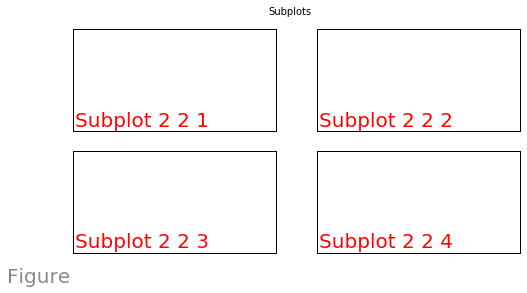

In [55]:
fig = plt.figure(figsize=(8,4))
fig.text(x=0.01, y=0.01, s='Figure',color='#888888', ha='left',va='bottom', fontsize=20)

for i in range(4):
    
    # fig.add_subplot(nrows, ncols, num)
    ax = fig.add_subplot(2, 2, i+1)
    ax.text(x=0.01, y=0.01,s='Subplot 2 2 '+str(i+1),color='red', ha='left',va='bottom', fontsize=20)
    ax.set_xticks([]); ax.set_yticks([])
    
ax.set_xticks([]); ax.set_yticks([])
fig.suptitle('Subplots')
#fig.savefig('filename.png', dpi=125)